In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("height-weight.csv")

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

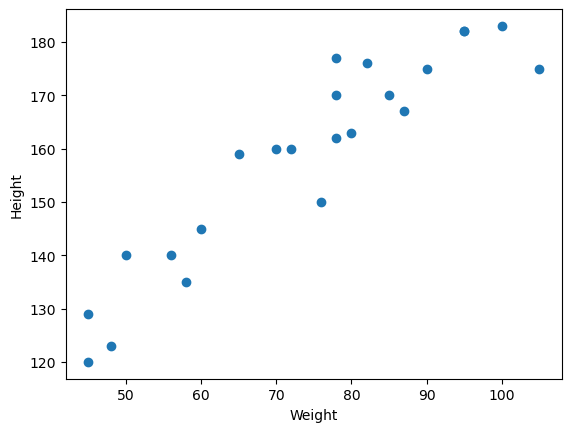

In [4]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [5]:
X=df[['Weight']]
y=df['Height']

In [6]:
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [7]:
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [9]:
X_train

,Weight
12,105
1,58
13,100
5,78
2,48
11,95
20,45
3,60
4,70
18,76


In [10]:
X_test

,Weight
15,78
9,78
0,45
8,95
17,65


In [11]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [14]:
X_train

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

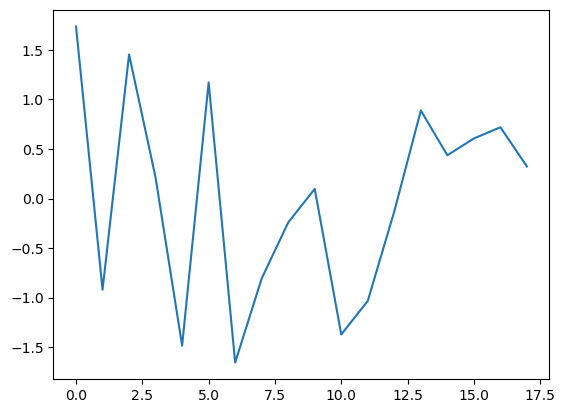

In [15]:
plt.plot(X_train)

In [16]:
X_test=scaler.transform(X_test)

In [17]:
X_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

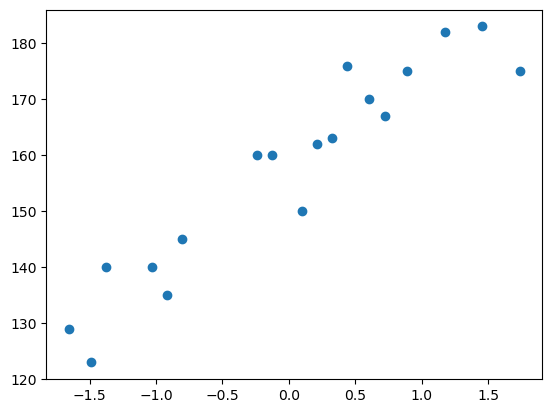

In [18]:
plt.scatter(X_train,y_train)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
regressor= LinearRegression()

In [21]:
regressor.fit(X_train,y_train)

LinearRegression()

In [22]:
regressor.coef_

array([17.03440872])

In [23]:
regressor.intercept_

157.5

In [24]:
print("The slope or coefficient of weight is",regressor.coef_)
print("Intercept",regressor.intercept_)

The slope or coefficient of weight is [17.03440872]
Intercept 157.5


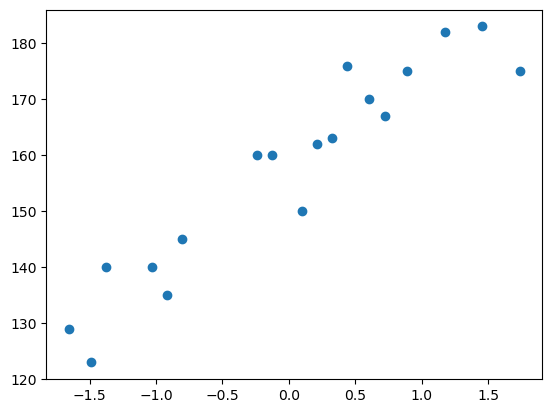

In [25]:
plt.scatter(X_train,y_train)

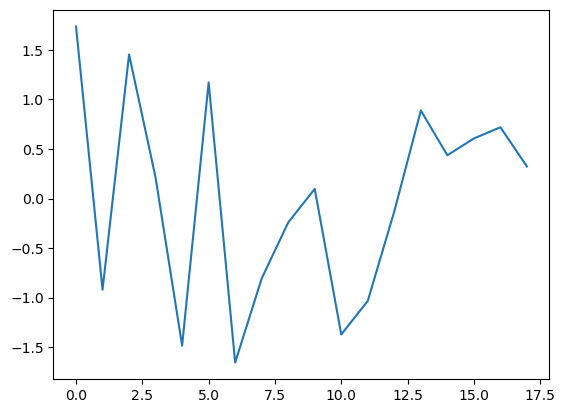

In [26]:
plt.plot(X_train)

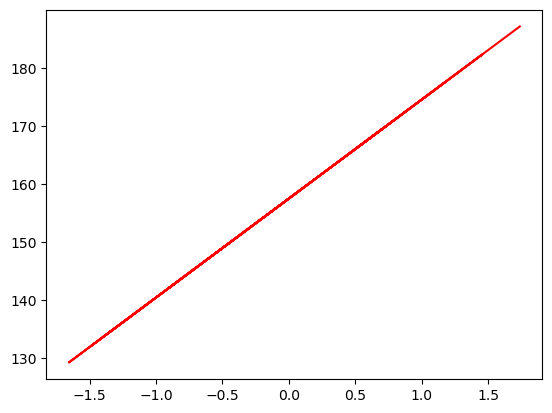

In [27]:
plt.plot(X_train,regressor.predict(X_train),'r')

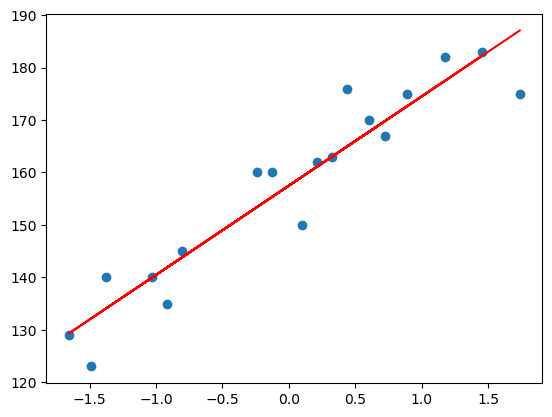

In [28]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

In [29]:
y_pred_test=regressor.predict(X_test)

In [30]:
y_pred_test,y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

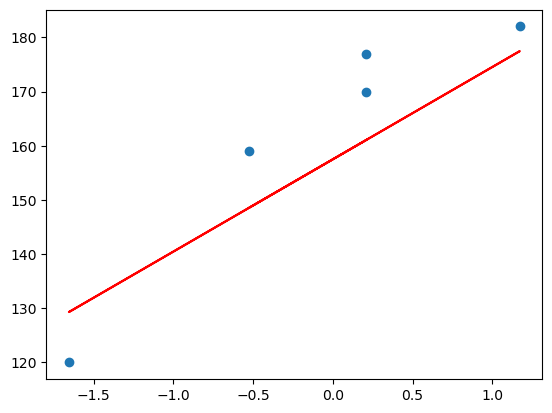

In [31]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test),'r')

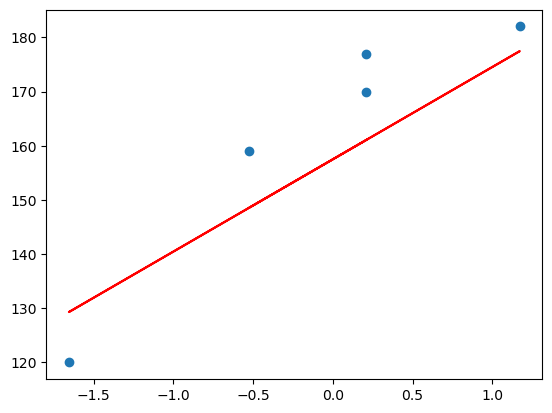

In [32]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred_test,'r')

In [33]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [34]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)

In [35]:
mse

109.77592599051664

In [36]:
mae

9.822657814519232

In [37]:
rmse=np.sqrt(mse)

In [38]:
rmse

10.477400726827081

In [39]:
from sklearn.metrics import r2_score

In [40]:
score=r2_score(y_test,y_pred_test)

In [41]:
score

0.776986986042344

In [42]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [43]:
regressor

LinearRegression()

In [44]:
## new dada point

In [45]:
scaled_weight=scaler.transform([[80]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [46]:
scaled_weight

array([[0.32350772]])

In [47]:
regressor.predict([scaled_weight[0]])

array([163.01076266])

In [48]:
regressor.predict(scaled_weight)

array([163.01076266])

In [50]:
import joblib
joblib.dump(regressor,'Weight-Height-Prediction')

['Weight-Height-Prediction']

In [51]:
modelwh=joblib.load('Weight-Height-Prediction')

In [52]:
modelwh.predict(scaled_weight)

array([163.01076266])